In [69]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
#from keras.utils import np_utils
import matplotlib.pyplot as plt
import random

from tensorflow.python.keras.saving.saved_model.layer_serialization import InputLayerSavedModelSaver


In [70]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Checking the format of picures, here we have 60000 pictures of size 28x28 for the
testing dataset and 10000 pictures of size 28x28 for testing set.

In [71]:
print('Training shape:{}'.format(np.shape(X_train)))
print('Testing shape:{}'.format(np.shape(X_test)))

Training shape:(60000, 28, 28)
Testing shape:(10000, 28, 28)


Showing some random pictures from training dataset.(Here will show 4 random 28x28 pictures from training dataset).

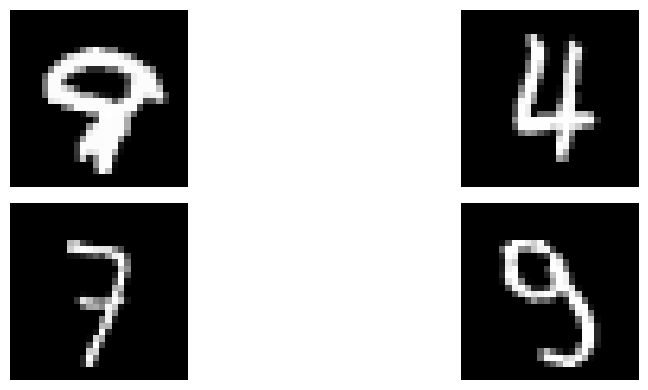

In [72]:
randTrainingNumbers =  random.sample(range(len(X_train)), 4)

fig, ax = plt.subplots(2,2, figsize=(12,4))

ax = ax.flatten()

for ax, idx in zip(ax, randTrainingNumbers):
    ax.imshow(X_train[idx],cmap = 'grey')
    ax.axis("off")

plt.tight_layout()
plt.show()


<h3>Data preprocessing</h3>

Ok, here let's define the number of classes as we have digits from 0 to 9,
we will have 10 classes, and aslo normalize the values to have activations from 0 to 1
(Min-Max scaling)

In [73]:
num_classes = 10
#normalize images
X_train = X_train / 255.0
X_test = X_test / 255.0

Reshape data to a vector, as it takes less memory and reduce time to train a model.
<br> 1)numpy flatten (flattens reagardless of its shape)
<br> 2)numpy reshape (convert array from one shape to another)

In [74]:
from tensorflow.keras.utils import to_categorical
#X_train = X_train.reshape(X_train.shape[0], -1)
#X_test = X_test.reshape(X_test.shape[0], -1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test  = X_test.reshape(-1, 28, 28, 1)
print(X_train.shape)
print(X_test.shape)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


Building the model

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout,InputLayer

In [76]:
model = Sequential()
model.add(InputLayer(shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=(3,3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size=(3,3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(activation="softmax",units=num_classes))


model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)              │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │        32,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 106,506 (416.04 KB)

 Trainable params: 106,506 (416.04 KB)

 Non-trainable params: 0 (0.00 B)

In [77]:
batch_size = 128
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 46s 105ms/step - accuracy: 0.5188 - loss: 1.3820 - val_accuracy: 0.9153 - val_loss: 0.2861
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 100ms/step - accuracy: 0.9110 - loss: 0.2952 - val_accuracy: 0.9557 - val_loss: 0.1495
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 100ms/step - accuracy: 0.9444 - loss: 0.1837 - val_accuracy: 0.9663 - val_loss: 0.1109
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 97ms/step - accuracy: 0.9570 - loss: 0.1400 - val_accuracy: 0.9738 - val_loss: 0.0835
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 95ms/step - accuracy: 0.9653 - loss: 0.1146 - val_accuracy: 0.9757 - val_loss: 0.0778


In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

In [81]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

random_num = np.random.choice(len(X_test))
X_sample = X_test[random_num]

y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_num]

y_sample_pred_class = y_pred_classes[random_num]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


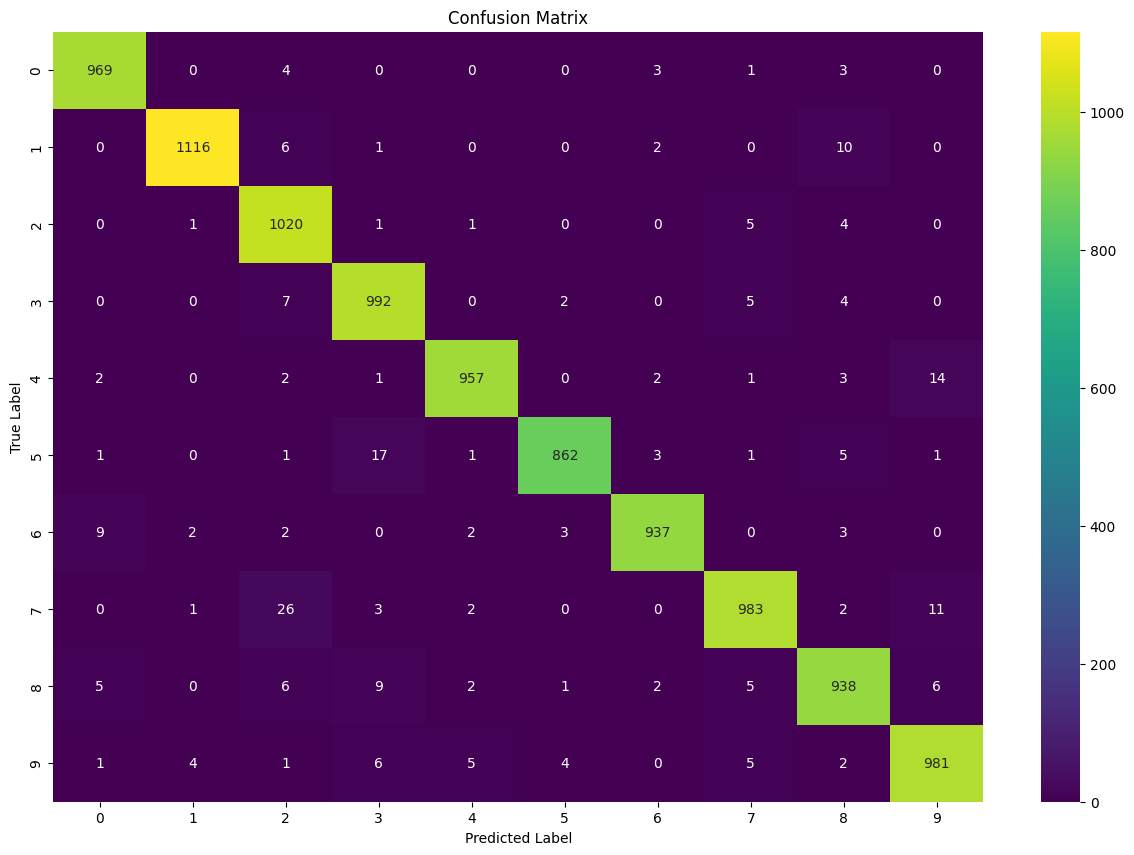

In [82]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion_mtx = confusion_matrix(y_true, y_pred_classes)

fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt="d", ax=ax, cmap="viridis")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
ax.set_title("Confusion Matrix");